In [6]:
# import utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set up global variables
COLORS = ['#debcff', '#ffadad', '#ffa7dc', '#ffd6a5', '#fdffb6', '#96e8ff', '#caffbf', '#bdb2ff', '#a0c4ff', '#ffc6ff']

# load multiple csv's, add a new column to each csv to distinguish the corresponding cities and then combine csv's into one

In [7]:
# load csvs 
city1_data = pd.read_csv('amsterdam_weekends.csv')
city2_data = pd.read_csv('athens_weekends.csv')
city3_data = pd.read_csv('barcelona_weekends.csv')
city4_data = pd.read_csv('berlin_weekends.csv')
city5_data = pd.read_csv('budapest_weekends.csv')
city6_data = pd.read_csv('lisbon_weekends.csv')
city7_data = pd.read_csv('london_weekends.csv')
city8_data = pd.read_csv('paris_weekends.csv')
city9_data = pd.read_csv('rome_weekends.csv')
city10_data = pd.read_csv('vienna_weekends.csv')

# Add in new city column to each csv with corresponding city names
city1_data = city1_data.assign(city='amsterdam')
city2_data = city2_data.assign(city='athens')
city3_data = city3_data.assign(city='barcelona')
city4_data = city4_data.assign(city='berlin')
city5_data = city5_data.assign(city='budapest')
city6_data = city6_data.assign(city='lisbon')
city7_data = city7_data.assign(city='london')
city8_data = city8_data.assign(city='paris')
city9_data = city9_data.assign(city='rome')
city10_data = city10_data.assign(city='vienna')

# combine all files into one csv
allcity_data = pd.concat([city1_data, city2_data, city3_data, city4_data, city5_data, city6_data, city7_data, city8_data, city9_data, city10_data], ignore_index=True)

# drop unnecessary columns
allcity_data.drop(['attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat'], axis=1, inplace=True)

# save new csv called allcity.csv
allcity_data.to_csv('allcity_weekends.csv')


In [8]:
#read new csv
allcity_data = pd.read_csv('allcity_weekends.csv')

In [10]:
# reorder csv to have the city column at the beginning
allcity_data = allcity_data[['city', 'realSum', 'room_type', 'room_shared','room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist']]

In [11]:
allcity_data.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist
count,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000
mean,283.964035,3.148167,0.289236,0.341893,9.392033,92.668791,1.151982,3.221146,0.682071
std,300.068554,1.288494,0.453416,0.474353,0.954835,8.926958,0.620310,2.401382,0.866153
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301
25%,150.760816,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.469271,0.246313
50%,216.463415,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.639264,0.410513
75%,326.140322,4.000000,1.000000,1.000000,10.000000,99.000000,1.000000,4.300299,0.734434
max,13656.358834,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577


In [12]:
allcity_data.head()

,city,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist
0,amsterdam,319.640053,Private room,False,True,2.0,False,0,1,9.0,88.0,1,4.763360,0.852117
1,amsterdam,347.995219,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748310,3.651591
2,amsterdam,482.975183,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384872,0.439852
3,amsterdam,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544723,0.318688
4,amsterdam,2771.541724,Entire home/apt,False,False,4.0,True,0,0,10.0,100.0,3,1.686798,1.458399


In [13]:
allcity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26207 entries, 0 to 26206
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        26207 non-null  object 
 1   realSum                     26207 non-null  float64
 2   room_type                   26207 non-null  object 
 3   room_shared                 26207 non-null  bool   
 4   room_private                26207 non-null  bool   
 5   person_capacity             26207 non-null  float64
 6   host_is_superhost           26207 non-null  bool   
 7   multi                       26207 non-null  int64  
 8   biz                         26207 non-null  int64  
 9   cleanliness_rating          26207 non-null  float64
 10  guest_satisfaction_overall  26207 non-null  float64
 11  bedrooms                    26207 non-null  int64  
 12  dist                        26207 non-null  float64
 13  metro_dist                  262

In [14]:
allcity_data['city'].value_counts()

city
london       5379
rome         4535
paris        3558
lisbon       2906
athens       2627
budapest     1948
vienna       1799
barcelona    1278
berlin       1200
amsterdam     977
Name: count, dtype: int64

In [15]:
allcity_data.isna().sum()

city                          0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
dtype: int64

In [16]:
allcity_data.duplicated().sum()

np.int64(0)

## Superhost and nonsuperhost breakdown

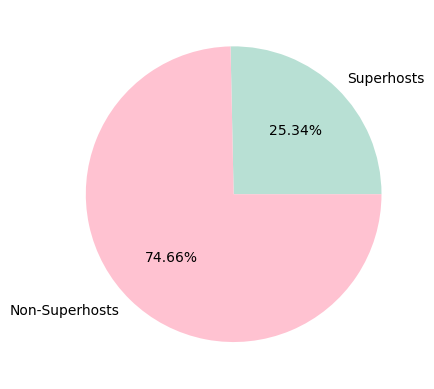

In [21]:
super_host_df = allcity_data.query('host_is_superhost == True')
plain_host_df = allcity_data.query('host_is_superhost == False')

total_host = len(allcity_data)
total_super_host = len(super_host_df)
total_plain_host = len(plain_host_df)

assert(total_super_host + total_plain_host == total_host)

values = [total_super_host, total_plain_host]
labels = ['Superhosts', 'Non-Superhosts']

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.2f%%', colors=['#b8e0d4', '#ffc2d1'])
plt.show()

## Superhost breakdown per city

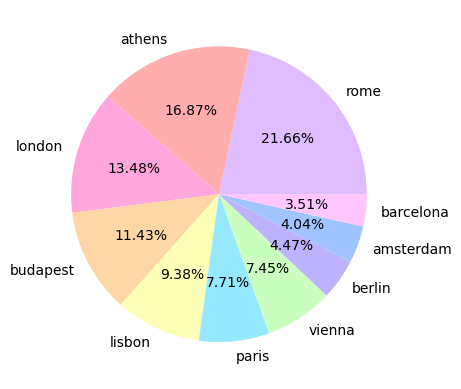

In [23]:
# get percentage of superhost in each city 
city_superhost = super_host_df['city'].value_counts(normalize=True).mul(100).round(2)

# separates city and percentages
values = city_superhost.array
labels = city_superhost.index

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.2f%%', colors=COLORS)
plt.show()





### How many are not superhosts?

In [25]:
not_superhost=allcity_data['host_is_superhost'].value_counts()[False]
print(not_superhost)

19567


## Shows the varying room types

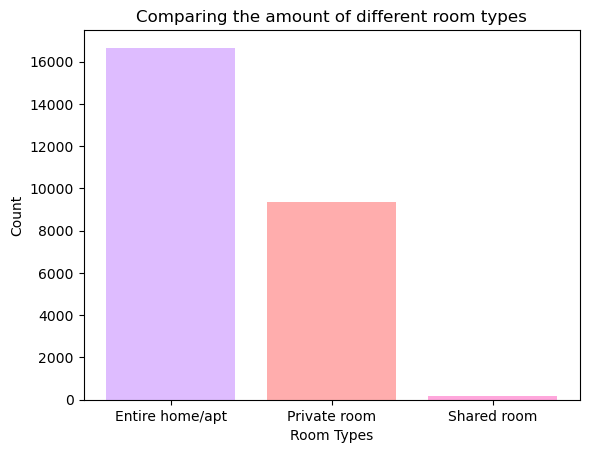

In [26]:
# panda's plotting function
# rooms = allcity_data['room_type'].value_counts()
# bar_colors = ['red', 'blue', 'orange']
# rooms.plot(kind='bar', stacked=True, color=bar_colors)
# plt.title('Room Types')
# plt.xlabel('Room Types')
# plt.ylabel('Count')
# plt.xticks(rotation=360)
# plt.show()


# matplotlib bar function
rooms = allcity_data['room_type'].value_counts()
values = rooms.array
labels = rooms.index


fig, ax = plt.subplots()
ax.bar(labels, values, color=COLORS)
ax.set_ylabel('Count')
ax.set_xlabel('Room Types')
ax.set_title('Comparing the amount of different room types')
plt.show()


### What is the count of bedrooms in each listing?

In [27]:
room_data = allcity_data['bedrooms'].value_counts()
print(room_data)

bedrooms
1     18525
2      4656
0      2277
3       686
4        49
5         6
9         5
6         1
10        1
8         1
Name: count, dtype: int64


## The below calculates the average rate for a two night weekend stay in a given city

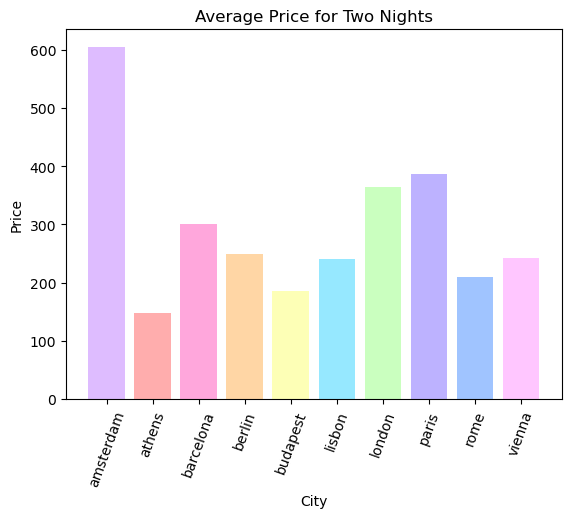

In [29]:
# calculate the average price for two nights in Amsterdam
avg_price = allcity_data.groupby('city')['realSum'].mean().round(2)

values = avg_price.array
labels = avg_price.index


fig, ax = plt.subplots()
ax.bar(labels, values, color=COLORS)
ax.set_ylabel('Price')
ax.set_xlabel('City')
ax.set_title('Average Price for Two Nights')
ax.tick_params(axis='x', rotation=70)
plt.show()

## The below calculates the average rating for airbnb listings in a given city

city
amsterdam    94.69
athens       94.91
barcelona    91.33
berlin       94.35
budapest     94.65
lisbon       91.14
london       90.92
paris        92.20
rome         93.05
vienna       93.67
Name: guest_satisfaction_overall, dtype: float64


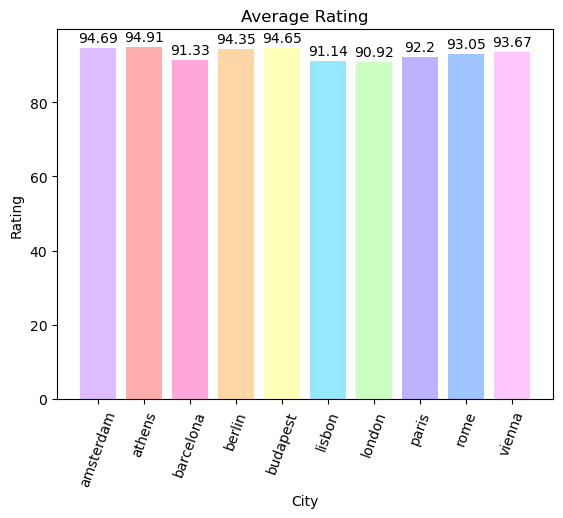

In [30]:
avg_rating = allcity_data.groupby('city')['guest_satisfaction_overall'].mean().round(2)
print(avg_rating)
values = avg_rating.array
labels = avg_rating.index
pct_label = values.astype(str)


fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=COLORS)
ax.bar_label(bars, labels=pct_label, padding=2)
ax.bar(labels, values, color=COLORS)
ax.set_ylabel('Rating')
ax.set_xlabel('City')
ax.set_title('Average Rating')
ax.tick_params(axis='x', rotation=70)
plt.show()

## The below shows the average cleanliness rating for each given city

city
amsterdam    9.47
athens       9.63
barcelona    9.30
berlin       9.45
budapest     9.49
lisbon       9.38
london       9.19
paris        9.27
rome         9.51
vienna       9.47
Name: cleanliness_rating, dtype: float64


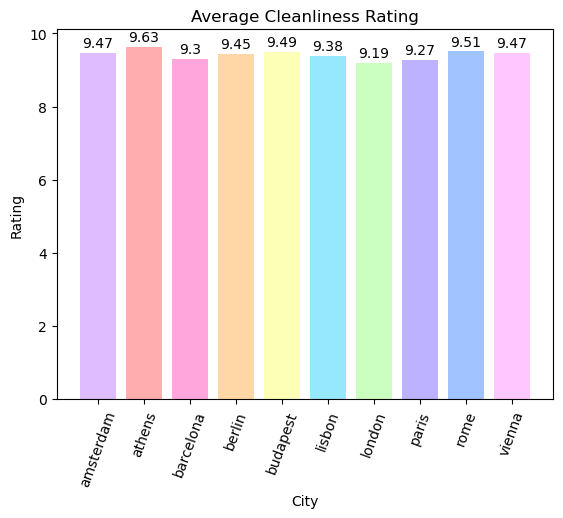

In [31]:
is_clean = allcity_data.groupby('city')['cleanliness_rating'].mean().round(2)
print(is_clean)
values = is_clean.array
labels = is_clean.index
pct_label = values.astype(str)

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=COLORS)
ax.bar_label(bars, labels=pct_label, padding=2)
ax.set_ylabel('Rating')
ax.set_xlabel('City')
ax.set_title('Average Cleanliness Rating')
ax.tick_params(axis='x', rotation=70)
plt.show()